# Datacamp Project: Anime TV-Shows Dataset 2023
__Fiona Hak<sup>1</sup>, Elora Vigo<sup>1</sup>, Céline Guo<sup>1</sup>, Shun Robert<sup>1</sup> et  Julien Giovanazzi<sup>2</sup>__
<br>
<sup>1. M2 AMI2B<br>2. M2 Agro</sup>

## Table of contents
* [Introduction](#introduction)
* [Requirements](#requirements)
* [The dataset](#dataset)
* [Data exploration](#exploration)
* [Base model](#base_model)
* [Submitting on RAMP](#submitting)

### Introduction <a class="anchor" id="introduction"></a>
The provided dataset comprises details about various anime series, encompassing information such as titles, episode counts release date ranges, member counts, and user scores. It represents a curated compilation of popular anime series as of its creation, totaling 4700 entries. The columns include Name (the anime title), Episodes (total number of episodes), Release (date range of release), Members (number of MyAnimeList users who added the anime), and Score (user-assigned score). These data were scraped from MyAnimeList, a renowned anime and manga database, for which credit is duly acknowledged. 

The issue raised was whether we'd be able to predict anime scores based on various quantitative variables, such as the number of episodes or the number of times they've been selected by users.

### Requirements <a class="anchor" id="requirements"></a>

In [27]:
import subprocess
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import AutoDateLocator, AutoDateFormatter

### The dataset <a class="anchor" id="dataset"></a>

The dataset is structured in the form of a table with five columns. Each row represents an anime series along with its characteristics. The first column, "Name," contains the title of the anime. The second column, "Episodes," indicates the total number of episodes in the series. The third column, "Release," presents the release date range of the anime. The fourth column, "Members," provides the number of MyAnimeList users who have added the anime to their list. Finally, the fifth column, "Score," displays the user-assigned score for the anime. Each row in the dataset represents a distinct entry for a specific anime series, along with its associated details.

The data was uploaded [here](https://www.kaggle.com/datasets/forgetabhi/anime-tv-shows-dataset-2023/data) after creating an account. The original file is available in the data/original_data/ folder.

The train and test data were randomly split into 80/20% proportions with the command :

In [7]:
subprocess.run('head -n 1 data/original_data/anime_data.csv > data/train.csv && head -n 1 data/original_data/anime_data.csv > data/test.csv && shuf data/original_data/anime_data.csv | split -d -l $(($(wc -l < data/original_data/anime_data.csv)*80/100)) - && cat x00 >> data/train.csv && cat x01 >> data/test.csv && rm x00 x01', shell=True)

CompletedProcess(args='head -n 1 data/original_data/anime_data.csv > data/train.csv && head -n 1 data/original_data/anime_data.csv > data/test.csv && shuf data/original_data/anime_data.csv | split -d -l $(($(wc -l < data/original_data/anime_data.csv)*80/100)) - && cat x00 >> data/train.csv && cat x01 >> data/test.csv && rm x00 x01', returncode=0)

### Data exploration <a class="anchor" id="exploration"></a>
First, let's visualize the data.

In [8]:
data_df = pd.read_csv('data/original_data/anime_data.csv')

In [9]:
train_df = pd.read_csv('data/train.csv')
train_df

,Unnamed: 0,Name,Episodes,Release,Members,Score
0,372,Shadows House 2nd Season,12.0,Jul 2022 - Sep 2022,116139,8.00
1,568,Beastars 2nd Season,12.0,Jan 2021 - Mar 2021,433375,7.79
2,3829,Girly Air Force,12.0,Jan 2019 - Mar 2019,79292,6.14
3,4135,Nippon-ichi no Otoko no Tamashii 2,16.0,May 1999 - May 1999,869,5.90
4,2980,Kage kara Mamoru!,12.0,Jan 2006 - Mar 2006,26351,6.58
...,...,...,...,...,...,...
3755,2801,Esper Mami,119.0,Apr 1987 - Oct 1989,2373,6.66
3756,2538,Araiguma Rascal,52.0,Jan 1977 - Dec 1977,3271,6.76
3757,1852,Tetsuwan Atom,193.0,Jan 1963 - Dec 1966,12636,7.10
3758,2066,Takahashi Rumiko Gekijou Ningyo no Mori,11.0,Oct 2003 - Dec 2003,27371,7.01


In [10]:
test_df = pd.read_csv('data/test.csv')
test_df

,Unnamed: 0,Name,Episodes,Release,Members,Score
0,2853.0,Megumi no Daigo: Kyuukoku no Orange,24,Sep 2023 -,23130,6.63
1,1911.0,Show By Rock!! Mashumairesh!!,12,Jan 2020 - Mar 2020,15610,7.08
2,120.0,Karakai Jouzu no Takagi-san 3,12,Jan 2022 - Mar 2022,181997,8.41
3,4611.0,The Reflection,12,Jul 2017 - Oct 2017,29388,5.12
4,1343.0,Ristorante Paradiso,11,Apr 2009 - Jun 2009,46666,7.31
...,...,...,...,...,...,...
936,877.0,Majo no Tabitabi,12,Oct 2020 - Dec 2020,391910,7.55
937,1511.0,High School DxD Hero,12,Apr 2018 - Jul 2018,501042,7.24
938,194.0,Naruto: Shippuuden,500,Feb 2007 - Mar 2017,2443151,8.26
939,1418.0,Fate/stay night,24,Jan 2006 - Jun 2006,934862,7.28


Here are some summaries of the nature and distribution of the data:

In [11]:
print(train_df.info()) ; print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3760 entries, 0 to 3759
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3760 non-null   int64  
 1   Name        3760 non-null   object 
 2   Episodes    3733 non-null   float64
 3   Release     3760 non-null   object 
 4   Members     3760 non-null   int64  
 5   Score       3753 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 176.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  940 non-null    float64
 1   Name        941 non-null    object 
 2   Episodes    935 non-null    object 
 3   Release     941 non-null    object 
 4   Members     941 non-null    object 
 5   Score       940 non-null    object 
dtypes: float64(1), object(5)
memory usage: 44.2+ KB
None


We can see that there are 3760 rows in the train dataframe and 941 in test. There are non-zero values in the important episodes and score columns in both cases. The unnamed column corresponds to the ranking count of the various animes in the original file and is of no interest to us here. Some columns of interest, including episodes, members and score, are of object type and will have to be converted back to float and int for analysis purposes, and missing data indexed as NaN.

In [20]:
#convert to numeric
num_scores = pd.to_numeric(train_df['Score'], errors='coerce')
num_episodes = pd.to_numeric(train_df['Episodes'], errors='coerce')
num_members = pd.to_numeric(train_df['Members'], errors='coerce')
#convert date
train_df['Release_Start'] = pd.to_datetime(train_df['Release_Start'], format='%Y-%m-%d')
train_df['Release_End'] = pd.to_datetime(train_df['Release_End'], format='%Y-%m-%d')
train_df['Release_Start'] = pd.to_datetime(train_df['Release_Start'])
train_df['Release_End'] = pd.to_datetime(train_df['Release_End'])

#train_df = train_df.drop(columns=['Release'])

#replace nan
train_df.replace('', pd.NA, inplace=True)

The target variable is in the column Score since we classify the animes' popularity.

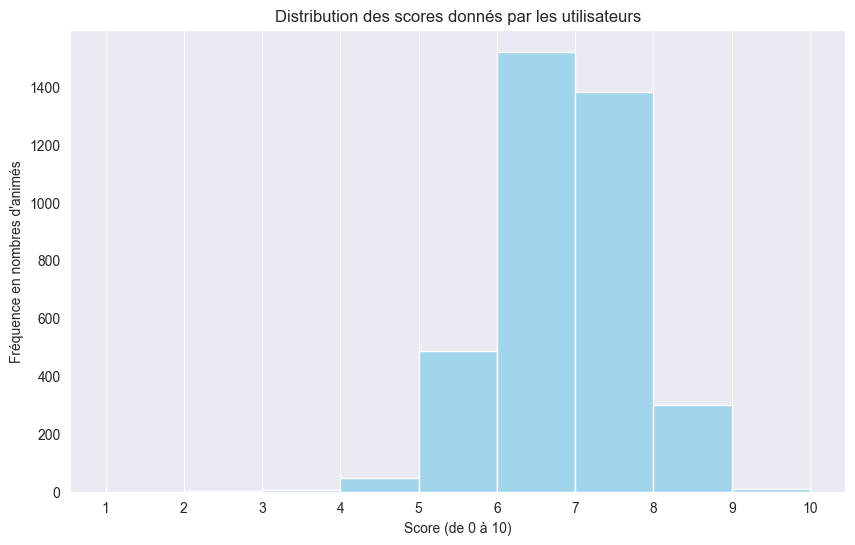

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(num_scores.dropna(), bins=range(1, 11), kde=False, color='skyblue')
plt.title('Distribution des scores donnés par les utilisateurs') ; plt.xlabel('Score (de 0 à 10)') ; plt.ylabel('Fréquence en nombres d\'animés')
plt.xticks(range(1, 11))
plt.grid(axis='y')
plt.show()

The distribution of scores is fairly unbalanced, peaking at around 7.

Finally, we have plotted the relationships between the main variables and the score:

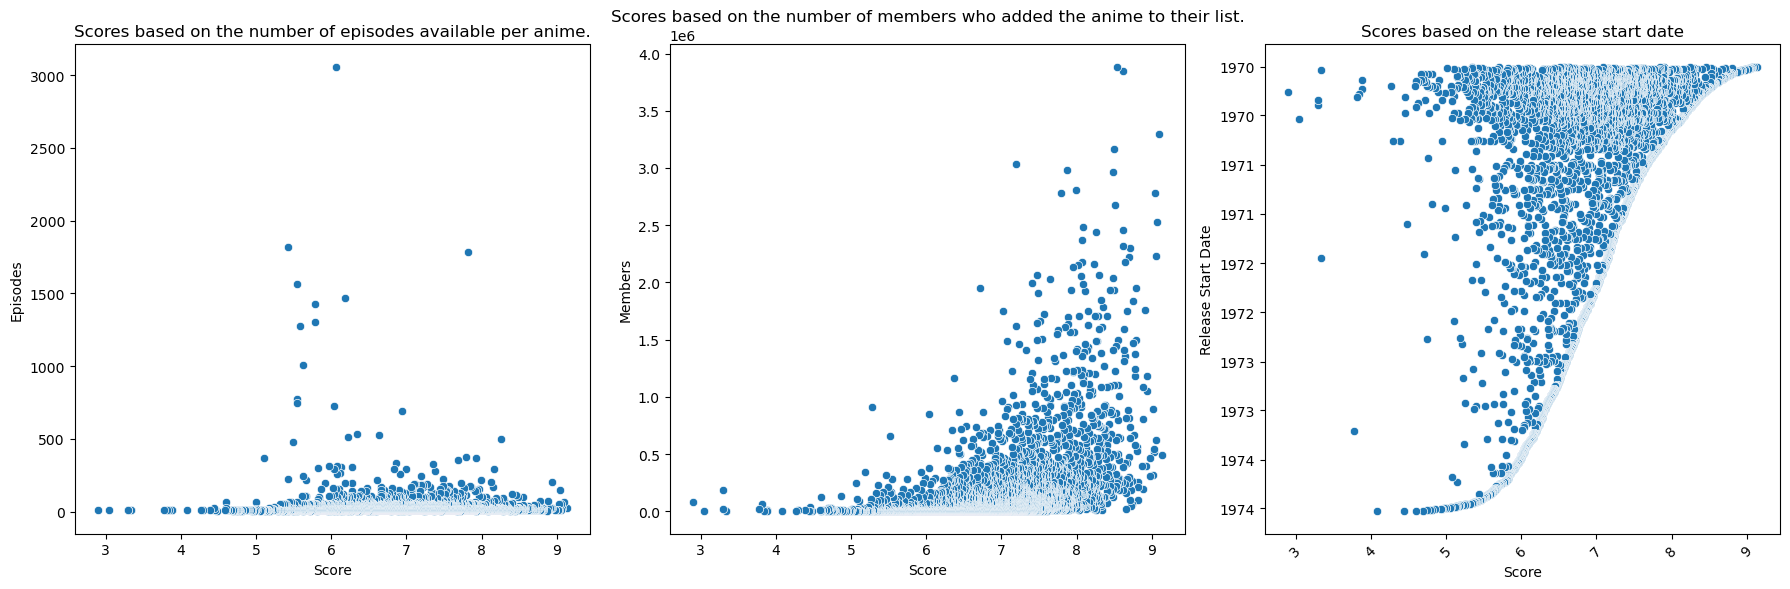

In [37]:
#display fig on same line
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  

# First plot for episodes
sns.scatterplot(x='Score', y='Episodes', data=data_df, ax=axes[0])
axes[0].set_title('Scores based on the number of episodes available per anime.')
axes[0].set_xlabel('Score')
axes[0].set_ylabel('Episodes')

# Second plot for members
sns.scatterplot(x='Score', y='Members', data=data_df, ax=axes[1])
axes[1].set_title('Scores based on the number of members who added the anime to their list.')
axes[1].set_xlabel('Score')
axes[1].set_ylabel('Members')

sns.scatterplot(x='Score', y='Release', data=data_df, ax=axes[2])
axes[2].set_title('Scores based on the release start date')
axes[2].set_xlabel('Score')
axes[2].set_ylabel('Release Start Date')
axes[2].tick_params(axis='x', rotation=45)

# Set AutoDateLocator and AutoDateFormatter for x-axis
axes[2].yaxis.set_major_locator(AutoDateLocator())
axes[2].yaxis.set_major_formatter(AutoDateFormatter(AutoDateLocator()))

# Rotate x-axis labels for better readability
axes[2].tick_params(axis='x', rotation=45)

# Display all plots
plt.tight_layout()
plt.show()

We can see that the more members have added the anime to their lists, the higher its score. On the other hand, the number of episodes seems to explain the score less. As for the release date, we can see that the earlier the release date is, the more score there is. 

### Base model <a class="anchor" id="base_model"></a>

<b>1. problem.py</b><br>

We decide to consider that we have 10 classes to classify the data. We round down the scores to make it easier to classify the anime using their scores. The result is a data set with unbalanced classes (with more observations around 7) as it can be seen on the histogram above.

We only keep numerical data (number of episodes, members in addition to the target) and the release date. There are some missing data in episodes. Those lines are dropped.

In [32]:
#the columns to process
col = ["Members", "Score", "Episodes", "Release_Start"]
data_sel = train_df[col].copy()

#drop episodes and members with NA
data_sel["Episodes"] = pd.to_numeric(data_sel["Episodes"], errors="coerce")
data_sel = data_sel.dropna(subset=["Episodes"]).copy()
data_sel["Members"] = pd.to_numeric(data_sel["Members"], errors="coerce")
data_sel = data_sel.dropna(subset=["Members"]).copy()
data_sel["Release_Start"] = pd.to_datetime(data_sel["Release_Start"], errors="coerce")
data_sel = data_sel.dropna(subset=["Release_Start"]).copy()

#target: take the floor of the score to get categories
data_sel["Score"] = pd.to_numeric(data_sel["Score"], errors="coerce").apply(np.floor)
med = data_sel["Score"].median()
data_sel["Score"].fillna(med, inplace=True)

X = data_sel.drop(columns=["Score"]).to_numpy()
y = data_sel["Score"].values

In [33]:
X

array([[116139, 12.0, Timestamp('2022-07-01 00:00:00')],
       [433375, 12.0, Timestamp('2021-01-01 00:00:00')],
       [79292, 12.0, Timestamp('2019-01-01 00:00:00')],
       ...,
       [12636, 193.0, Timestamp('1963-01-01 00:00:00')],
       [27371, 11.0, Timestamp('2003-10-01 00:00:00')],
       [410381, 12.0, Timestamp('2014-10-01 00:00:00')]], dtype=object)

In [34]:
y

array([8., 7., 6., ..., 7., 7., 7.])

<b>2. classifier.py</b><br>

### Submitting on RAMP <a class="anchor" id="submitting"></a>

In [35]:
!ramp-test --submission starting_kit

/bin/bash: ramp-test: command not found
